# Seasonal PCA Residuals

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
pca_df = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\data\daily\commodities\soft_commodities\grains\pca_grains\CBOT_DL_GRAIN, 1D.csv',index_col='time', parse_dates=True)

pca_df.head()

,"ZC1!, CBOT: Close","ZS1!, CBOT: Close","ZM1!, CBOT: Close","ZL1!, CBOT: Close","ZW1!, CBOT: Close"
time,,,,,
1970-01-05 01:00:00+00:00,120.375,251.250,74.1,8.67,145.375
1970-01-06 01:00:00+00:00,120.625,252.000,73.0,8.84,146.000
1970-01-07 01:00:00+00:00,121.125,253.250,73.2,9.18,146.875
1970-01-08 01:00:00+00:00,121.750,253.750,73.6,9.24,146.750
1970-01-09 01:00:00+00:00,120.875,253.375,74.0,9.25,145.625


In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(pca_df.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [ ]:
for column in pca_df.columns:
    print(column)
    plot_acf(np.log(pca_df[column]).diff(1).dropna(axis=0), alpha=1, lags=20)
    plot_pacf(np.log(pca_df[column]).diff(1).dropna(axis=0), alpha=1, lags=20)

    plt.show()

In [ ]:
pca_logDiff_df = np.log(pca_df).diff(1).dropna(axis=0).fillna(0)

pca_logDiff_df.head()

,"ZC1!, CBOT: Close","ZS1!, CBOT: Close","ZM1!, CBOT: Close","ZL1!, CBOT: Close","ZW1!, CBOT: Close"
time,,,,,
1970-01-06 01:00:00+00:00,0.002075,0.002981,-0.014956,0.019418,0.004290
1970-01-07 01:00:00+00:00,0.004137,0.004948,0.002736,0.037740,0.005975
1970-01-08 01:00:00+00:00,0.005147,0.001972,0.005450,0.006515,-0.000851
1970-01-09 01:00:00+00:00,-0.007213,-0.001479,0.005420,0.001082,-0.007696
1970-01-12 01:00:00+00:00,0.003098,0.004430,0.018742,0.022449,-0.008621


In [ ]:
# pc = PCA(pca_logDiff_df,ncomp=4)

In [ ]:
pc.plot_rsquare()
plt.show()

In [ ]:

cacheModels = {

    'nComps':4,

}

In [ ]:
decompose = []
for i, column in enumerate(pca_logDiff_df.columns):
    res = seasonal_decompose(pca_logDiff_df[column], model="additive",period=252)
    decompose.append(res.resid)



In [ ]:
decompose[0].dropna(axis=0)

time
1970-07-07 00:00:00+00:00    0.005965
1970-07-08 00:00:00+00:00    0.018291
1970-07-09 00:00:00+00:00   -0.004593
1970-07-10 00:00:00+00:00    0.006628
1970-07-13 00:00:00+00:00   -0.016546
                               ...   
2022-05-09 00:00:00+00:00   -0.018049
2022-05-10 00:00:00+00:00    0.002415
2022-05-11 00:00:00+00:00    0.020587
2022-05-12 00:00:00+00:00    0.000737
2022-05-13 00:00:00+00:00   -0.008778
Name: resid, Length: 12880, dtype: float64

In [ ]:
pca_resid_df = pd.DataFrame(decompose).T.dropna(axis=0)

In [ ]:
pca_resid_df.head().dropna(axis=0)

,resid,resid,resid,resid,resid
time,,,,,
1970-07-07 00:00:00+00:00,0.005965,0.001600,0.007600,0.001578,0.008065
1970-07-08 00:00:00+00:00,0.018291,0.023460,0.030788,0.032586,0.014945
1970-07-09 00:00:00+00:00,-0.004593,-0.017298,-0.016264,-0.019733,-0.000564
1970-07-10 00:00:00+00:00,0.006628,-0.003730,0.007530,0.001008,-0.001096
1970-07-13 00:00:00+00:00,-0.016546,0.033588,0.032364,0.028588,0.007852


In [ ]:
pca_resid_df.to_csv('resid.csv')

In [ ]:
df = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\exploratory_analysis\pca\resid.csv',index_col='time', parse_dates=True)

In [ ]:
def pca_model(pca_event):
    pca_logDiff_df = np.log(df).diff(1).dropna(axis=0).fillna(0)
    pc = PCA(pca_logDiff_df,ncomp=pca_event['nComp'])

    cacheModels = {

        'nComps':4,

    }

    forecast=0
    for i in range(0,cacheModels['nComps']):
        forecast+= pc.eigenvecs['eigenvec_'+str(i)][0]*pc.factors['comp_'+str(i)]

    return forecast

pca_event = {

    'nComp':4,

}



In [ ]:
fcast = pca_model(pca_event)


In [ ]:
print(fcast)

time
1970-07-08 00:00:00+00:00    0.011794
1970-09-23 00:00:00+00:00   -0.133407
1970-10-23 00:00:00+00:00    0.068579
1971-05-20 00:00:00+00:00    0.035716
1971-05-21 00:00:00+00:00    0.046062
                               ...   
2021-10-15 00:00:00+00:00    0.035944
2021-11-12 01:00:00+00:00    0.047841
2021-12-22 01:00:00+00:00   -0.019860
2022-02-23 01:00:00+00:00   -0.081377
2022-03-01 01:00:00+00:00   -0.002260
Name: comp_0, Length: 412, dtype: float64


In [ ]:
fcast.head()

time
1970-07-08 00:00:00+00:00    0.011794
1970-09-23 00:00:00+00:00   -0.133407
1970-10-23 00:00:00+00:00    0.068579
1971-05-20 00:00:00+00:00    0.035716
1971-05-21 00:00:00+00:00    0.046062
Name: comp_0, dtype: float64

In [ ]:
len(fcast)

412

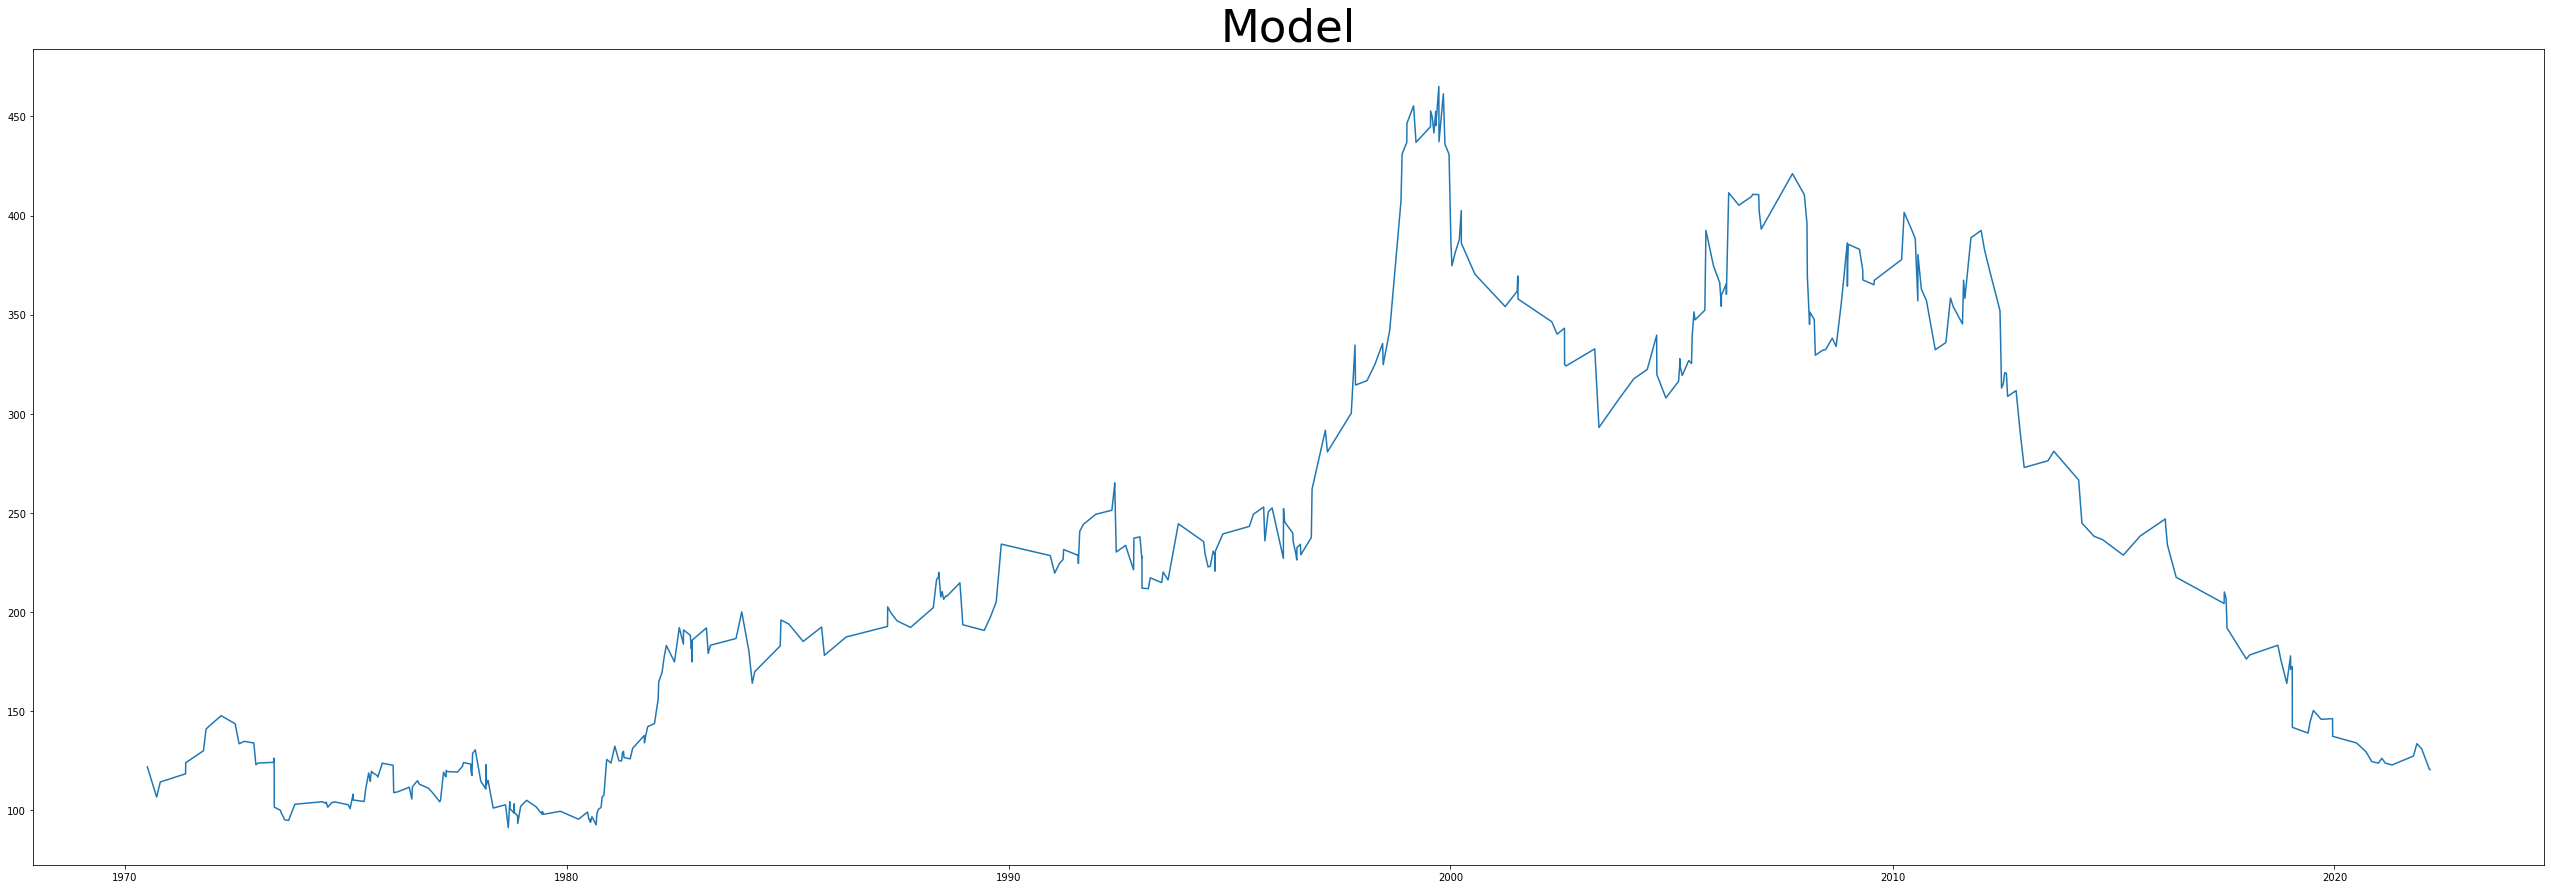

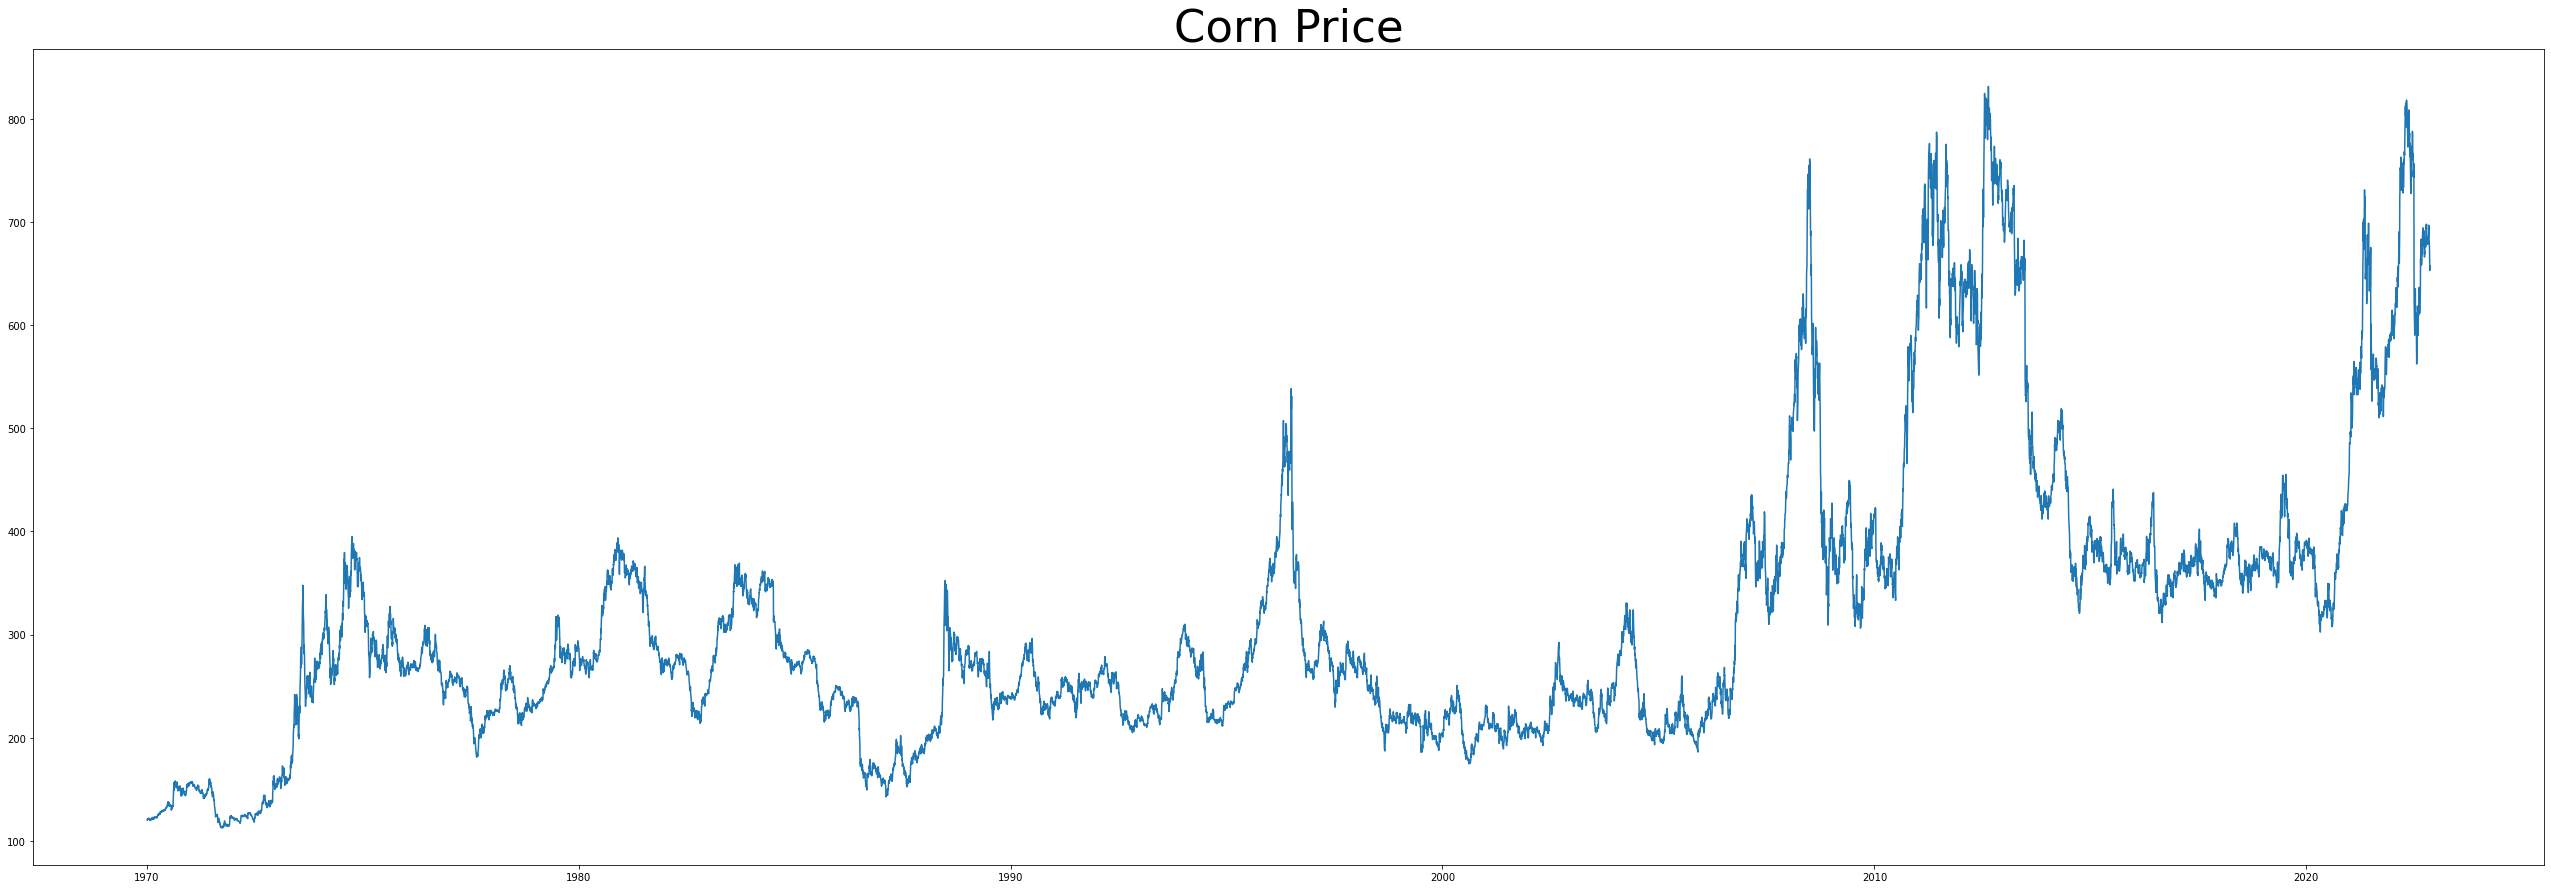

In [ ]:

# Plotting Projections
plt.figure(figsize=(45,15))

plt.title('Model',fontsize=45)
plt.plot(np.exp(fcast.cumsum())*pca_df['ZC1!, CBOT: Close'][0])

plt.show()

# Plotting Corn Price
plt.figure(figsize=(45,15))

plt.title('Corn Price',fontsize=45)
plt.plot(pca_df['ZC1!, CBOT: Close'])

plt.show()

In [ ]:
pca_logDiff_df = np.log(pca_resid_df)
pc = PCA(pca_logDiff_df,ncomp=pca_event['nComp'])

cacheModels = {

    'nComps':4,

}

forecast=0
for i in range(0,cacheModels['nComps']):
    forecast+= pc.eigenvecs['eigenvec_'+str(i)][0]*pc.factors['comp_'+str(i)]


ValueError: data contains non-finite values (inf, NaN). You should drop these values or
use one of the methods for adjusting data for missing-values.